# **Sistem Rekomendasi Tempat Wisata - Submission Machine Learning Terapan**

### **Project Overview**

Pariwisata di Indonesia merupakan sektor ekonomi yang penting di Indonesia. Di tahun 2019, pariwisata menduduki peringkat ke-tiga dalam hal penerimaan devisa setelah komoditas gas dan minyak bumi serta minyak kelapa sawit. Berdasarkan data tahun 2016, jumlah wisatawan mancanegara yang datang ke Indonesia sebesar 11.525.963 juta lebih atau tumbuh sebesar 10,79% dibandingkan tahun sebelumnya. Kekayaan alam dan budaya adalah komponen penting dalam pariwisata di Indonesia. Indonesia juga merupakan negara kepulauan terbesar dan berpenduduk terbanyak di dunia.


> 


Dari latar belakang diatas, proyek ini saya buat dengan tujuan memanfaatkan potensi-potensi tempat wisata yang ada di seluruh Indonesia. Semakin banyak orang-orang yang tau tempat-tempat wisata yang ada, maka akan semakin meningkat perekonomian yang ada di Indonesia.


> 


Referensi dari project overview di atas dapat dilihat dari link berikut ini [Pariwisata di Indonesia](https://id.wikipedia.org/wiki/Pariwisata_di_Indonesia)

### **Business Understanding**

Dari project overview di atas, sistem rekomendasi ini dikembangkan untuk menjawab pertanyaan berikut:

Problem Statement :

*   Dengan data-data yang dimiliki, bagaimana memberikan rekomendasi tempat wisata yang disukai oleh pengunjung ke pengunjung yang lain.


Goals :

*   Menghasilkan sistem rekomendasi yang akurat yang mengacu pada rating preferensi pengunjung sebelumnya




### **Data Understanding**

Dataset yang digunakan pada proyek sistem rekomendasi ini yaitu data Indonesia Tourism Destination yang didapatkan dari situs kaggle. Informasi dataset dapat dilihat pada [Indonesia Tourism Destination](https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination?select=package_tourism.csv)

Unzip file data

In [2]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: package_tourism.csv     
  inflating: tourism_rating.csv      
  inflating: tourism_with_id.csv     
  inflating: user.csv                


Berikutnya, baca data-data di atas dengan menggunakan fungsi pandas.read_csv

In [5]:
import pandas as pd

places = pd.read_csv('/content/package_tourism.csv')
ratings = pd.read_csv('/content/tourism_rating.csv')
destinations = pd.read_csv('/content/tourism_with_id.csv')
users = pd.read_csv('/content/user.csv')

print('Jumlah data tempat wisata terdekat: ', len(places.Package.unique()))
print('Jumlah data penilaian tempat wisata: ', len(ratings.User_Id.unique()))
print('Jumlah data tempat wisata di 5 kota besar di Indonesia: ', len(destinations.Place_Id.unique()))
print('Jumlah data pengunjung tempat wisata: ', len(users.User_Id.unique()))

Jumlah data tempat wisata terdekat:  100
Jumlah data penilaian tempat wisata:  300
Jumlah data tempat wisata di 5 kota besar di Indonesia:  437
Jumlah data pengunjung tempat wisata:  300


### **Univariate Exploratory Data Analysis**

Variabel-variabel pada Indonesia Tourism dataset adalah sebagai berikut :

*   places : yaitu rekomendasi tempat terdekat
*   ratings : penilaian yang diberikan pengunjung
*   destinations : yaitu informasi tempat wisata di 5 kota besar di indonesia
*   users : yaitu data pengunjung tempat wisata





##### **Place Variabel**

eksplorasi variabel accepts, yaitu rekomendasi tempat terdekat

In [6]:
places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [7]:
places.head(5)

,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN


##### **Rating Variabel**

explorasi variabel rating, yaitu penilaian yang diberikan pengunjung

In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [9]:
ratings.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [10]:
ratings.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


Dari hasil output di atas, memberitahukan bahwa nilai minimun rating yaitu 1 dan nilai maksimum rating yaitu 5. Dengan begitu nilai rating berkisar 1 hingga 5.

##### **Destination Variabel**

explorasi variabel destination, yaitu informasi tempat wisata di 5 kota besar di Indonesia

In [11]:
destinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [12]:
destinations.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


Drop kolom yang tidak dibutuhkan

In [13]:
destinations.drop(['Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11', 'Unnamed: 12'], axis=1, inplace=True)
destinations.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5


##### **User Variabel**

explorasi variabel user, yaitu data pengunjung wisata

In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


### **Data Preprocessing**

##### **Menggabungkan Tempat Wisata**

menggabungkan beberapa file dengan fungsi concatenate berdasarkan Place_Id

In [15]:
import numpy as np

# Menggabungkan seluruh Place_Id pada kategori Tempat Wisata
tourism_all = np.concatenate((
    ratings.Place_Id.unique(),
    destinations.Place_Id.unique()
))

# Mengurutkan data dan menghapus data yang saya
tourism_all = np.sort(np.unique(tourism_all))

print('Jumlah seluruh data tempat wisata berdasarkan Place_Id: ', len(tourism_all))

Jumlah seluruh data tempat wisata berdasarkan Place_Id:  437


##### **Menggabungkan seluruh user**

menggabungkan beberapa file dengan fungsi concatenate berdasarkan User_Id

In [16]:
# Menggabungkan seluruh userID
user_all = np.concatenate((
    ratings.User_Id.unique(),
    users.User_Id.unique()
))
 
# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all)) 
 
print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  300


##### **Mengetahui jumlah rating**

In [17]:
# Menggabungkan file place, rating, destination ke dalam dataframe tourism_info 
tourism_info = pd.concat([places, ratings, destinations])
 
# Menggabungkan dataframe rating dengan tourism_info berdasarkan nilai Place_Id
tourism = pd.merge(ratings, tourism_info , on='Place_Id', how='left')
tourism

,User_Id_x,Place_Id,Place_Ratings_x,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5,User_Id_y,Place_Ratings_y,Place_Name,Description,Category,Price,Rating
0,1,179,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN
1,1,179,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,4.0,NaN,NaN,NaN,NaN,NaN
2,1,179,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,3.0,NaN,NaN,NaN,NaN,NaN
3,1,179,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,5.0,NaN,NaN,NaN,NaN,NaN
4,1,179,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249051,300,163,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,287.0,5.0,NaN,NaN,NaN,NaN,NaN
249052,300,163,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,294.0,4.0,NaN,NaN,NaN,NaN,NaN
249053,300,163,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295.0,1.0,NaN,NaN,NaN,NaN,NaN
249054,300,163,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,2.0,NaN,NaN,NaN,NaN,NaN


Setelah melakukan merge, banyak sekali missing value. Cek missing value 

In [18]:
# Cek missing value dengan fungsi isnull()
tourism.isnull().sum()

User_Id_x               0
Place_Id                0
Place_Ratings_x         0
Package            249056
City               239056
Place_Tourism1     249056
Place_Tourism2     249056
Place_Tourism3     249056
Place_Tourism4     249056
Place_Tourism5     249056
User_Id_y           10000
Place_Ratings_y     10000
Place_Name         239056
Description        239056
Category           239056
Price              239056
Rating             239056
dtype: int64

Terdapat banyak missing value pada sebagian besar fitur. Hanya fitur User_Id, Place_Id dan Place_Rating_x yang memiliki 0 missing value. Berikutnya, menggabungkan rating berdasarkan Place_Id

In [19]:
tourism.groupby('Place_Id').sum()

,User_Id_x,Place_Ratings_x,Package,User_Id_y,Place_Ratings_y,Price,Rating
Place_Id,,,,,,,
1,50065,1273,0.0,47430.0,1206.0,360000.0,82.8
2,84760,1846,0.0,81500.0,1775.0,0.0,115.0
3,74360,960,0.0,70642.0,912.0,5130000.0,87.4
4,59576,1320,0.0,56868.0,1260.0,210000.0,94.5
5,78208,2288,0.0,75200.0,2200.0,2350000.0,112.5
...,...,...,...,...,...,...,...
433,74640,1824,0.0,71530.0,1748.0,46000.0,101.2
434,88894,1560,0.0,85475.0,1500.0,0.0,115.0
435,47808,918,0.0,45152.0,867.0,0.0,74.8


##### **Menggabungkan Data dengan Fitur Nama Tempat Wisata**

In [22]:
# Definisikan dataframe rating ke dalam variabel all_tourism_rate
all_tourism_rate = ratings
all_tourism_rate

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [24]:
# Menggabungkan all tourism_rate dengan dataframe destination berdasarkan Place_Id
all_tourism = pd.merge(all_tourism_rate, destinations[['Place_Id', 'Place_Name', 'Description', 'Category', 'City']], on='Place_Id', how='left')
 
# Print dataframe all_tourism
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta
...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Taman Hiburan,Surabaya
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Budaya,Jakarta
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Cagar Alam,Bandung
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Tempat Ibadah,Bandung


### **Data Preparation**

Mengatasi Missing Value

In [25]:
# Mengecek missing value pada dataframe all_tourism
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
Category         0
City             0
dtype: int64

In [26]:
# Mengurutkan tourism berdasarkan Place_Id kemudian memasukkannya ke dalam variabel fix_tourism
fix_tourism = all_tourism.sort_values('Place_Id', ascending=True)
fix_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City
6236,187,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta
5348,162,1,5,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta
5610,169,1,5,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta
2089,64,1,2,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta
5231,159,1,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta
...,...,...,...,...,...,...,...
8710,263,437,5,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya
6209,187,437,5,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya
7082,213,437,4,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya
6041,182,437,1,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya


Sekarang, kita memiliki 10000 baris data. Untuk mengecek berapa jumlah tourism yang mencakup data tersebut, jalankan kode berikut

In [27]:
# Mengecek berapa jumlah fix_tourism
len(fix_tourism.Place_Id.unique())

437

mebuat variabel preparation yang berisi dataframe fix_tourism kemudian mengurutkan berdasarkan Place_Id

In [28]:
preparation = fix_tourism
preparation.sort_values('Place_Id')

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City
6236,187,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta
5537,167,1,5,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta
3862,118,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta
6273,189,1,5,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta
7552,227,1,5,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta
...,...,...,...,...,...,...,...
1986,61,437,5,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya
9888,297,437,4,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya
4560,139,437,2,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya
3199,98,437,2,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya


In [29]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('Place_Id')
preparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City
6236,187,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta
2435,75,2,5,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta
7968,240,3,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta
97,4,4,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta
...,...,...,...,...,...,...,...
6258,188,433,1,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya
8208,247,434,1,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya
7140,215,435,4,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya
5460,165,436,4,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya


Selanjutnya, kita perlu melakukan konversi data series menjadi list. Dalam hal ini, kita menggunakan fungsi tolist() dari library numpy

In [30]:
# Mengonversi data series Place_Id menjadi dalam bentuk list
tourism_id = preparation['Place_Id'].tolist()
 
# Mengonversi data series Place_Name menjadi dalam bentuk list
tourism_name = preparation['Place_Name'].tolist()
 
# Mengonversi data series Description menjadi dalam bentuk list
tourism_description = preparation['Description'].tolist()

# Mengonversi data series City menjadi dalam bentuk list
tourism_city = preparation['City'].tolist()
 
print(len(tourism_id))
print(len(tourism_name))
print(len(tourism_description))
print(len(tourism_city))

437
437
437
437


In [31]:
# Membuat dictionary untuk data ‘tourism_id’, ‘tourism_name’, dan ‘tourism_description’
tourism_new = pd.DataFrame({
    'id': tourism_id,
    'tourism_name': tourism_name,
    'description': tourism_description,
    'city': tourism_city
})
tourism_new

,id,tourism_name,description,city
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Jakarta
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Jakarta
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Jakarta
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Jakarta
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta
...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Surabaya
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Surabaya
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Surabaya
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Surabaya


### **Model Development dengan Content Based Filtering**

cek data

In [32]:
data = tourism_new
data.sample(5)

,id,tourism_name,description,city
222,223,Masjid Raya Bandung,"Masjid Raya Bandung Provinsi Jawa Barat, yang ...",Bandung
66,67,Margasatwa Muara Angke,Suaka margasatwa Muara Angke adalah sebuah kaw...,Jakarta
242,243,Kampung Korea Bandung,Kampung Korea adalah sebuah kawasan di kota Ba...,Bandung
407,408,Kebun Binatang Surabaya,Kebun Binatang Surabaya (KBS) (Dialek Arekan: ...,Surabaya
123,124,Kauman Pakualaman Yogyakarta,Pakualaman adalah sebuah kecamatan di Kota Yog...,Yogyakarta


menggukan fungsi TFIDFVectorizer()

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data city
tf.fit(data['city']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['bandung', 'jakarta', 'semarang', 'surabaya', 'yogyakarta']

Selanjutnya, lakukan fit dan transformasi ke dalam bentuk matriks

In [34]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['city']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(437, 5)

Untuk menghasilkan vektor tf-idf dalam bentuk matriks, kita menggunakan fungsi todense()

In [35]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        ...,
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.]])

#### **Cosine Similarity**

menghitung derajat kesamaan (similarity degree) antar tourism dengan teknik cosine similarity

In [36]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

Selanjutnya, mari kita lihat matriks kesamaan setiap tourism dengan menampilkan nama tourism dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis=0).

In [37]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama tourism
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['tourism_name'], columns=data['tourism_name'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (437, 437)


tourism_name,Pantai Sedahan,Freedom Library,Pulau Pari,Museum Joang 45,Jalan Braga
tourism_name,,,,,
Margasatwa Muara Angke,0.0,1.0,1.0,1.0,0.0
Dusun Bambu,0.0,0.0,0.0,0.0,1.0
Galeri Nasional Indonesia,0.0,1.0,1.0,1.0,0.0
Alive Museum Ancol,0.0,1.0,1.0,1.0,0.0
Watu Gunung Ungaran,0.0,0.0,0.0,0.0,0.0
Perpustakaan Nasional,0.0,1.0,1.0,1.0,0.0
Keraton Yogyakarta,1.0,0.0,0.0,0.0,0.0
Candi Ijo,1.0,0.0,0.0,0.0,0.0
Monumen Serangan Umum 1 Maret,1.0,0.0,0.0,0.0,0.0


#### **Mendapatkan Rekomendasi**

*   Nama_tourism : Nama tourism (index kemiripan dataframe).
*   Similarity_data : Dataframe mengenai similarity yang telah kita definisikan sebelumnya.

*   Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ‘tourism_name’ dan ‘city’.
*   k : Banyak rekomendasi yang ingin diberikan.








In [38]:
def tourism_recommendations(nama_tourism, similarity_data=cosine_sim_df, items=data[['tourism_name', 'city']], k=5):

 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_tourism].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_tourism, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

Selanjutnya, terapkan kode di atas untuk menemukan rekomendasi tempat wisata yang mirip dengan KFC

In [39]:
data[data.tourism_name.eq('Pantai Greweng')]

,id,tourism_name,description,city
197,198,Pantai Greweng,"Di Kabupaten Gunungkidul, tidak sulit memilih ...",Yogyakarta


In [40]:
# Mendapatkan rekomendasi tempat wisata yang mirip dengan Pantai Greweng
tourism_recommendations('Pantai Greweng')

,tourism_name,city
0,Puncak Pinus Becici,Yogyakarta
1,Kampung Wisata Taman Sari,Yogyakarta
2,Situs Warungboto,Yogyakarta
3,Keraton Yogyakarta,Yogyakarta
4,Sindu Kusuma Edupark (SKE),Yogyakarta


### **Model Development dengan Collaborative Filtering**

import library yang dibutuhkan

In [41]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

memahami data rating, serta memasukkan nya ke variabel baru df

In [43]:
# Membaca dataset
 
df = ratings
df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


melakukan persiapan data untuk menyandikan (encode) fitur ‘user’ dan ‘placeID’ ke dalam indeks integer

In [44]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['User_Id'].unique().tolist()
print('list userID: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

Selanjutnya, lakukan hal yang sama pada fitur 'Place_Id'

In [45]:
# Mengubah Place_Id menjadi list tanpa nilai yang sama
tourism_ids = df['Place_Id'].unique().tolist()
 
# Melakukan proses encoding Place_Id
tourism_to_tourism_encoded = {x: i for i, x in enumerate(tourism_ids)}
 
# Melakukan proses encoding angka ke Place_Id
tourism_encoded_to_tourism = {i: x for i, x in enumerate(tourism_ids)}

Berikutnya, petakan User_Id dan Place_Id ke dataframe yang berkaitan

In [46]:
# Mapping User_Id ke dataframe user
df['users'] = df['User_Id'].map(user_to_user_encoded)
 
# Mapping Place_Id ke dataframe tourism
df['destinations'] = df['Place_Id'].map(tourism_to_tourism_encoded)

Terakhir, cek beberapa hal dalam data seperti jumlah user, jumlah tourism, dan mengubah nilai rating menjadi float

In [47]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah resto
num_tourism = len(tourism_encoded_to_tourism)
print(num_tourism)
 
# Mengubah rating menjadi nilai float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['Place_Ratings'])
 
# Nilai maksimal rating
max_rating = max(df['Place_Ratings'])
 
print('Number of User: {}, Number of Tourism: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_tourism, min_rating, max_rating
))

300
437
Number of User: 300, Number of Tourism: 437, Min Rating: 1.0, Max Rating: 5.0


#### **Membagi Data untuk Training dan Validasi**

In [48]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,User_Id,Place_Id,Place_Ratings,users,destinations
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


bagi data train dan validasi dengan komposisi 80:20

In [49]:
# Membuat variabel x untuk mencocokkan data user dan destination menjadi satu value
x = df[['users', 'destinations']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


### **Proses Training**

In [50]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_tourism = num_tourism
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.tourism_embedding = layers.Embedding( # layer embeddings tourism
        num_tourism,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.tourism_bias = layers.Embedding(num_tourism, 1) # layer embedding tourism bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    tourism_vector = self.tourism_embedding(inputs[:, 1]) # memanggil layer embedding 3
    tourism_bias = self.tourism_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_tourism = tf.tensordot(user_vector, tourism_vector, 2) 
 
    x = dot_user_tourism + user_bias + tourism_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

Selanjutnya, lakukan proses compile terhadap model

In [51]:
model = RecommenderNet(num_users, num_tourism, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [52]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
1000/1000 [==============================] - 7s 4ms/step - loss: 0.6947 - root_mean_squared_error: 0.3464 - val_loss: 0.6963 - val_root_mean_squared_error: 0.3472
Epoch 2/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6871 - root_mean_squared_error: 0.3409 - val_loss: 0.6960 - val_root_mean_squared_error: 0.3470
Epoch 3/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6808 - root_mean_squared_error: 0.3363 - val_loss: 0.6964 - val_root_mean_squared_error: 0.3473
Epoch 4/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6761 - root_mean_squared_error: 0.3329 - val_loss: 0.6970 - val_root_mean_squared_error: 0.3477
Epoch 5/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6728 - root_mean_squared_error: 0.3304 - val_loss: 0.6973 - val_root_mean_squared_error: 0.3478
Epoch 6/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6673 - root_mean_squared_error: 0.3264 - val_l

#### **Visualisasi Metrik**

plot metrik evaluasi dengan matplotlib

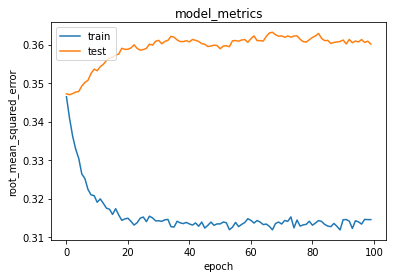

In [53]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Perhatikanlah, proses training model cukup smooth dan model konvergen pada epochs sekitar 100. Dari proses ini, kita memperoleh nilai error akhir sebesar sekitar 0.31 dan error pada data validasi sebesar 0.36. 

#### **Mendapatkan Rekomendasi Tempat Wisata**

In [54]:
tourism_df = tourism_new
df = pd.read_csv('/content/tourism_rating.csv')
 
# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
tourism_visited_by_user = df[df.User_Id == user_id]
 
tourism_not_visited = tourism_df[~tourism_df['id'].isin(tourism_visited_by_user.Place_Id.values)]['id'] 
tourism_not_visited = list(
    set(tourism_not_visited)
    .intersection(set(tourism_to_tourism_encoded.keys()))
)
 
tourism_not_visited = [[tourism_to_tourism_encoded.get(x)] for x in tourism_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_tourism_array = np.hstack(
    ([[user_encoder]] * len(tourism_not_visited), tourism_not_visited)
)

Selanjutnya, untuk memperoleh rekomendasi tempat wisata, gunakan fungsi model.predict() dari library Keras

In [55]:
ratings = model.predict(user_tourism_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_tourism_ids = [
    tourism_encoded_to_tourism.get(tourism_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Tourism with high ratings from user')
print('----' * 8)
 
top_tourism_user = (
    tourism_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
tourism_df_rows = tourism_df[tourism_df['id'].isin(top_tourism_user)]
for row in tourism_df_rows.itertuples():
    print(row.tourism_name, ':', row.city)
 
print('----' * 8)
print('Top 10 tourism recommendation')
print('----' * 8)
 
recommended_tourism = tourism_df[tourism_df['id'].isin(recommended_tourism_ids)]
for row in recommended_tourism.itertuples():
    print(row.tourism_name, ':', row.city)

Showing recommendations for users: 285
Tourism with high ratings from user
--------------------------------
Dunia Fantasi : Jakarta
Hutan Pinus Pengger : Yogyakarta
Watu Goyang : Yogyakarta
Wisata Alam Wana Wisata Penggaron : Semarang
Air Terjun Semirang : Semarang
--------------------------------
Top 10 tourism recommendation
--------------------------------
Museum Tekstil : Jakarta
Sumur Gumuling : Yogyakarta
Monumen Yogya Kembali : Yogyakarta
The World Landmarks - Merapi Park Yogyakarta : Yogyakarta
Puncak Gunung Api Purba - Nglanggeran : Yogyakarta
Pantai Baron : Yogyakarta
Pintoe Langit Dahromo : Yogyakarta
Kebun Teh Nglinggo : Yogyakarta
Geoforest Watu Payung Turunan : Yogyakarta
Keraton Surabaya : Surabaya


Dari hasil rekomendasi di atas, Semarang dan Yogyakarta menjadi kota yang paling tinggi ratingnya, dan top 10 tempat wisata yang direkomendasikan oleh sistem adalah kota Yogyakarta.